In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing all images
data_dir = 'images'

# Define image dimensions and batch size
image_height = 224
image_width = 224
batch_size = 32

# Create an ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split images into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


KeyboardInterrupt: 

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the directory containing all images
data_dir = 'images'

# Define image dimensions and batch size
image_height = 224
image_width = 224
batch_size = 32

# Create an ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split images into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load MobileNetV2 pre-trained on ImageNet dataset, excluding the top classification layer
base_model = MobileNetV2(input_shape=(image_height, image_width, 3), include_top=False, weights='imagenet')

# Add custom classification layers on top of MobileNetV2
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in MobileNetV2 base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 373 images belonging to 22 classes.
Found 79 images belonging to 22 classes.
Epoch 1/10
11/11 [==============================] - 12s 540ms/step - loss: -190.6027 - accuracy: 0.0264 - val_loss: -392.3169 - val_accuracy: 0.0156
Epoch 2/10
11/11 [==============================] - 4s 318ms/step - loss: -605.0359 - accuracy: 0.0235 - val_loss: -772.7990 - val_accuracy: 0.0312
Epoch 3/10
11/11 [==============================] - 4s 316ms/step - loss: -1126.1478 - accuracy: 0.0323 - val_loss: -1345.0410 - val_accuracy: 0.0312
Epoch 4/10
11/11 [==============================] - 4s 315ms/step - loss: -1786.4978 - accuracy: 0.0323 - val_loss: -1994.6809 - val_accuracy: 0.0312
Epoch 5/10
11/11 [==============================] - 4s 321ms/step - loss: -2542.4004 - accuracy: 0.0323 - val_loss: -3044.3955 - val_accuracy: 0.0312
Epoch 6/10
11/11 [==============================] - 4s 319ms/step - loss: -3539.1077 - accuracy: 0.0293 - val_loss: -3947.2729 - val_accuracy: 0.0312
Epoch 7/10
11/11 [==

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the directory containing all images
data_dir = 'images'

# Define image dimensions and batch size
image_height = 224
image_width = 224
batch_size = 32

# Create an ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split images into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Add custom classification layers on top of VGG16
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 373 images belonging to 22 classes.
Found 79 images belonging to 22 classes.
Epoch 1/10
11/11 [==============================] - 74s 7s/step - loss: -25.9424 - accuracy: 0.0293 - val_loss: -44.7267 - val_accuracy: 0.0312
Epoch 2/10
11/11 [==============================] - 66s 6s/step - loss: -65.2152 - accuracy: 0.0323 - val_loss: -83.5656 - val_accuracy: 0.0312
Epoch 3/10
11/11 [==============================] - 61s 6s/step - loss: -105.8739 - accuracy: 0.0323 - val_loss: -114.5947 - val_accuracy: 0.0312
Epoch 4/10
11/11 [==============================] - 69s 6s/step - loss: -154.8721 - accuracy: 0.0264 - val_loss: -175.4311 - val_accuracy: 0.0312
Epoch 5/10
11/11 [==============================] - 77s 7s/step - loss: -214.4380 - accuracy: 0.0312 - val_loss: -250.5145 - val_accuracy: 0.0312
Epoch 6/10
11/11 [==============================] - 74s 7s/step - loss: -293.7089 - accuracy: 0.0264 - val_loss: -319.5141 - val_accuracy: 0.0312
Epoch 7/10
11/11 [===========================

Epoch 1/10
11/11 [==============================] - 75s 7s/step - loss: -856.7394 - accuracy: 0.0235 - val_loss: -972.6301 - val_accuracy: 0.0312
Epoch 2/10
11/11 [==============================] - 75s 7s/step - loss: -1005.4815 - accuracy: 0.0256 - val_loss: -1032.1326 - val_accuracy: 0.0312
Epoch 3/10
11/11 [==============================] - 77s 7s/step - loss: -1176.2607 - accuracy: 0.0312 - val_loss: -1339.3359 - val_accuracy: 0.0312
Epoch 4/10
11/11 [==============================] - 215s 5s/step - loss: -1365.2390 - accuracy: 0.0293 - val_loss: -1449.4711 - val_accuracy: 0.0312
Epoch 5/10
11/11 [==============================] - 199s 19s/step - loss: -1551.7866 - accuracy: 0.0323 - val_loss: -1623.8893 - val_accuracy: 0.0156
Epoch 6/10
11/11 [==============================] - 65s 6s/step - loss: -1745.8995 - accuracy: 0.0323 - val_loss: -1753.7339 - val_accuracy: 0.0312
Epoch 7/10
11/11 [==============================] - 72s 7s/step - loss: -2012.0768 - accuracy: 0.0264 - val_los

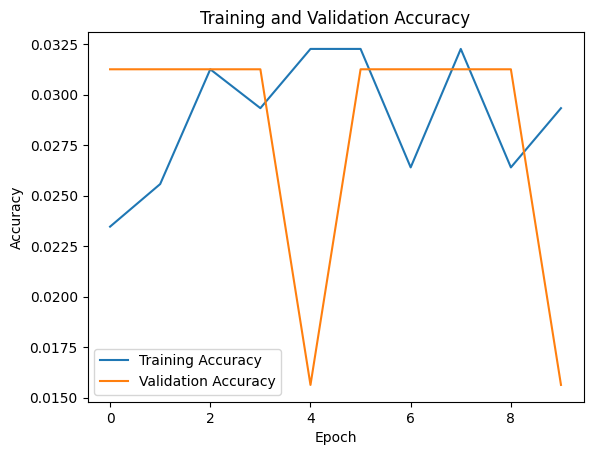

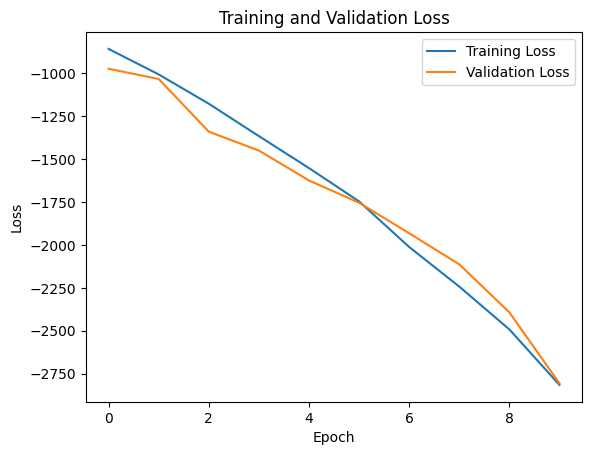

In [5]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 6s 6s/step


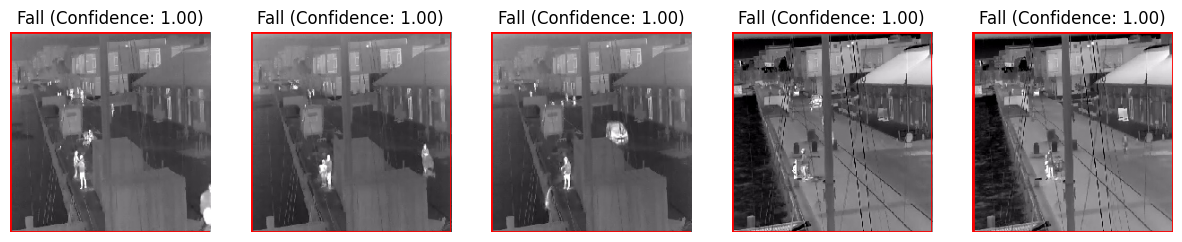

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to plot images with predictions
def plot_images_with_predictions(generator, model, num_images=5):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)
    
    # Make predictions on the images
    predictions = model.predict(images)
    
    # Create subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        # Plot image
        axes[i].imshow(images[i])
        axes[i].axis('off')
        
        # Add prediction text
        if predictions[i] >= 0.5:
            axes[i].set_title('Fall (Confidence: {:.2f})'.format(predictions[i][0]))
        else:
            axes[i].set_title('Non-Fall (Confidence: {:.2f})'.format(1 - predictions[i][0]))
        
        # Add bounding box around predicted region (if applicable)
        if predictions[i] >= 0.5:
            rect = patches.Rectangle((0,0), image_width, image_height, linewidth=2, edgecolor='r', facecolor='none')
            axes[i].add_patch(rect)
    
    plt.show()

# Generate predictions on a batch of validation images
plot_images_with_predictions(validation_generator, model)


1/1 [==============================] - 3s 3s/step


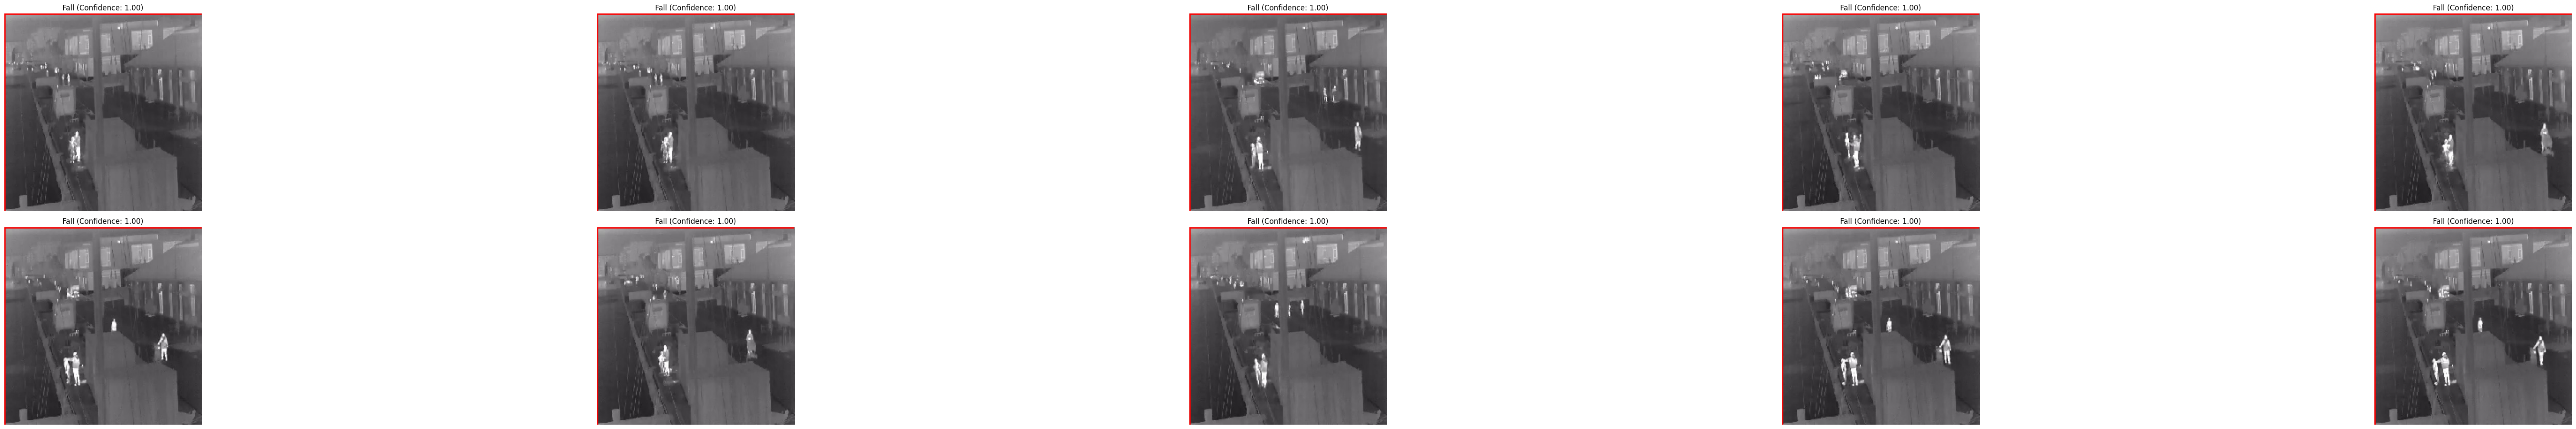

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to plot images with predictions
def plot_images_with_predictions(generator, model, num_batches=1, num_images_per_batch=5):
    # Create subplots
    fig, axes = plt.subplots(num_batches, num_images_per_batch, figsize=(15*num_images_per_batch, 5*num_batches))
    
    for j in range(num_batches):
        # Get a batch of images and labels from the generator
        images, labels = next(generator)
        
        # Make predictions on the images
        predictions = model.predict(images)
        
        for i in range(num_images_per_batch):
            # Plot image
            axes[j, i].imshow(images[i])
            axes[j, i].axis('off')
            
            # Add prediction text
            if predictions[i] >= 0.5:
                axes[j, i].set_title('Fall (Confidence: {:.2f})'.format(predictions[i][0]))
            else:
                axes[j, i].set_title('Non-Fall (Confidence: {:.2f})'.format(1 - predictions[i][0]))
            
            # Add bounding box around predicted region (if applicable)
            if predictions[i] >= 0.5:
                rect = patches.Rectangle((0,0), images[i].shape[1], images[i].shape[0], linewidth=2, edgecolor='r', facecolor='none')
                axes[j, i].add_patch(rect)
    
    plt.tight_layout()
    plt.show()

# Generate predictions on multiple batches of validation images
plot_images_with_predictions(validation_generator, model, num_batches=2, num_images_per_batch=5)


1/1 [==============================] - 3s 3s/step


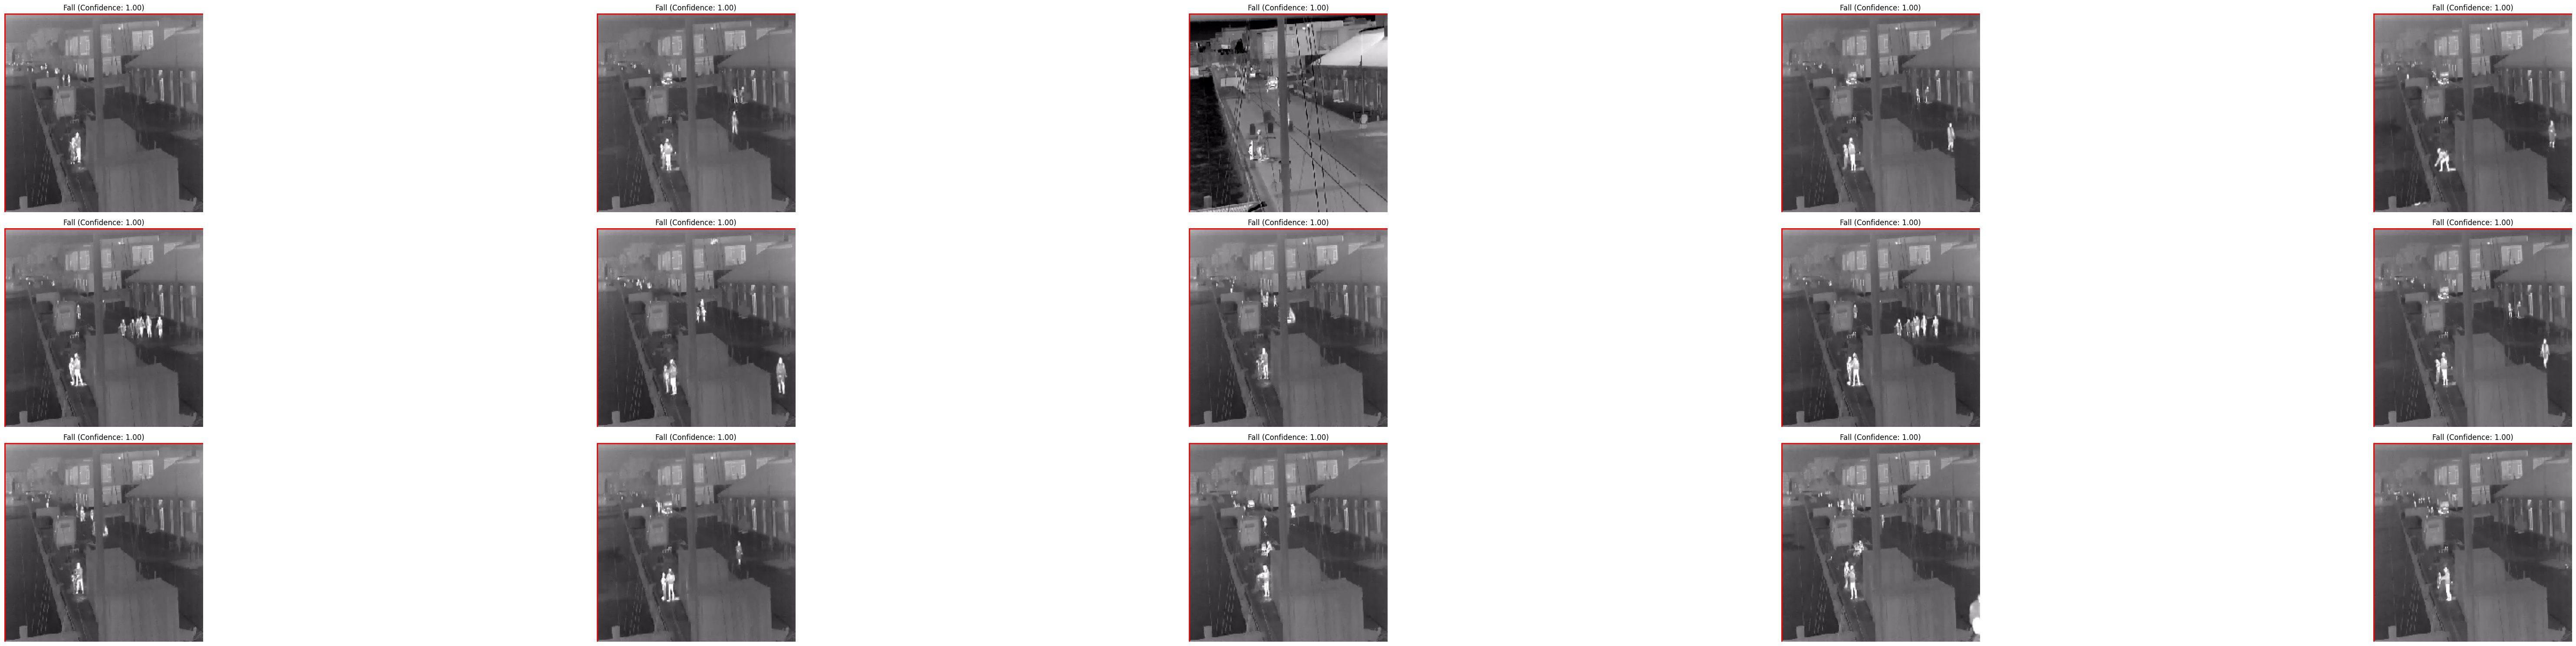

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to plot images with predictions
def plot_images_with_predictions(generator, model, num_images_per_batch=5):
    # Get the number of batches in the generator
    num_batches = len(generator)
    
    # Create subplots
    fig, axes = plt.subplots(num_batches, num_images_per_batch, figsize=(15*num_images_per_batch, 5*num_batches))
    
    for j in range(num_batches):
        # Get a batch of images and labels from the generator
        images, labels = next(generator)
        
        # Make predictions on the images
        predictions = model.predict(images)
        
        for i in range(num_images_per_batch):
            # Plot image
            axes[j, i].imshow(images[i])
            axes[j, i].axis('off')
            
            # Add prediction text
            if predictions[i] >= 0.5:
                axes[j, i].set_title('Fall (Confidence: {:.2f})'.format(predictions[i][0]))
            else:
                axes[j, i].set_title('Non-Fall (Confidence: {:.2f})'.format(1 - predictions[i][0]))
            
            # Add bounding box around predicted region (if applicable)
            if predictions[i] >= 0.5:
                rect = patches.Rectangle((0,0), images[i].shape[1], images[i].shape[0], linewidth=2, edgecolor='r', facecolor='none')
                axes[j, i].add_patch(rect)
    
    plt.tight_layout()
    plt.show()

# Generate predictions on all frames in multiple batches of validation images
plot_images_with_predictions(validation_generator, model, num_images_per_batch=5)


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the directory containing all images
data_dir = 'fall_dataset'

# Define image dimensions and batch size
image_height = 224
image_width = 224
batch_size = 32

# Create an ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split images into training and validation sets
train_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'fall'),  # Path to fall-related images
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'fall'),  # Path to fall-related images
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the base ResNet50 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Add custom classification layers on top of ResNet50
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: Unexpected value for `steps_per_epoch`. Received value is 0. Please check the docstring for `model.fit()` for supported values.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the directory containing all images
data_dir = 'fall_dataset'

# Define image dimensions and batch size
image_height = 224
image_width = 224
batch_size = 32

# Create an ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split images into training and validation sets
train_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'fall'),  # Path to fall-related images
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'fall'),  # Path to fall-related images
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the base ResNet50 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Add custom classification layers on top of ResNet50
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate model accuracy on validation set
print("Model Accuracy on Validation Set:")
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make predictions on new images
test_image_path = "path/to/your/test/image.jpg"
test_image = load_img(test_image_path, target_size=(image_height, image_width))
test_image = img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
if prediction >= 0.5:
    print("Fall Detected!")
else:
    print("No Fall Detected.")


In [13]:
!pip install --upgrade pip
!pip install -q tflite-model-maker

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.1 MB 3.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/2.1 MB 6.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.1 MB 7.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.4/2.1 MB 7.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.0/2.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.5 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\akshra_\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: To modify pip, please run the following command:
C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
DEPRECATION: Loading egg at c:\users\akshra_\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [54 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing depende

In [15]:
	
import os
import numpy as np
import tensorflow as tf


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
image_path = 'fall_dataset/'

# Create an ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Load images from the folder using the ImageDataGenerator
image_generator = datagen.flow_from_directory(
    image_path,                     # Path to the target directory
    target_size=(224, 224),         # Resize images to (224, 224)
    batch_size=32,                  # Number of images to yield from the generator in each batch
    class_mode='binary'             # Since you're loading images from folders, 'binary' is suitable for a binary classification task
)

# Now you can iterate over the image_generator to access batches of images and labels
for images, labels in image_generator:
    # 'images' is a batch of input images
    # 'labels' is a batch of labels corresponding to each image
    # Perform your operations here
    print("Batch shape:", images.shape)  # Print batch shape for debugging
    print("Labels:", labels)  # Print batch labels for debugging
    break  # Stop iteration after the first batch for demonstration purposes


In [ ]:
import matplotlib.pyplot as plt

def get_label_color(predicted_label, true_label):
    if predicted_label == true_label:
        return 'black'
    else:
        return 'red'

plt.figure(figsize=(20, 30))
predicted_labels = model.predict(X_val)
for i in range(30):  # Adjust the number of images you want to display
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap=plt.cm.gray)

    predicted_label = np.argmax(predicted_labels[i])
    true_label = y_val[i]
    color = get_label_color(predicted_label, true_label)
    ax.xaxis.label.set_color(color)
    plt.xlabel('Predicted: {} (True: {})'.format(predicted_label, true_label))

plt.show()
